In [11]:
#%load_ext autoreload
%autoreload 2
from data import *

  Fire Name  Year Fire_ID Fire_SegID  Database State  UTM_Zone        UTM_X  \
0  Buckweed  2007     bck   bck_1035  Training    CA        11  368133.5165   
1  Buckweed  2007     bck   bck_1090  Training    CA        11  367871.0165   
2  Buckweed  2007     bck   bck_1570  Training    CA        11  367503.5165   
3  Buckweed  2007     bck    bck_235  Training    CA        11  371108.5165   
4  Buckweed  2007     bck    bck_363  Training    CA        11  370763.5165   

         UTM_Y  Response  ... Peak_I15_mm/h  Peak_I30_mm/h Peak_I60_mm/h  \
0  3823231.989         0  ...           3.2            2.0           2.0   
1  3822984.489         0  ...           3.2            2.0           2.0   
2  3821741.989         0  ...           3.2            2.0           2.0   
3  3824991.989         0  ...           1.6            1.2           0.8   
4  3824576.989         0  ...           1.6            1.2           0.8   

  ContributingArea_km2  PropHM23  dNBR/1000        KF  Acc015_mm  Ac

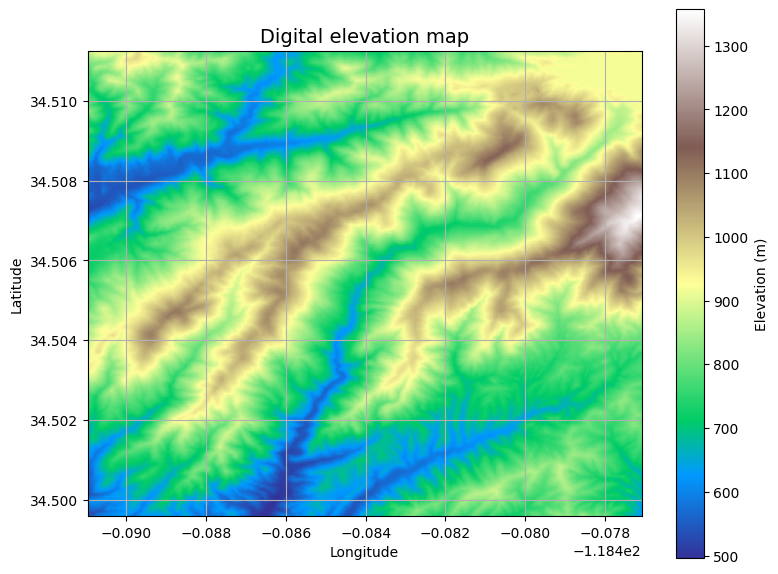

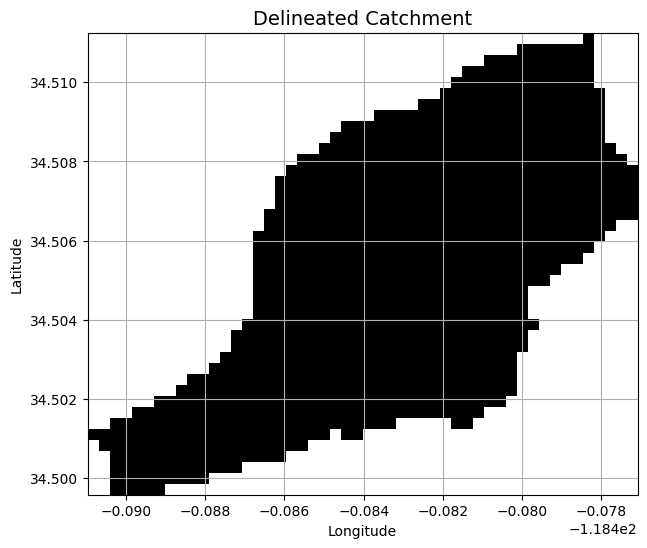

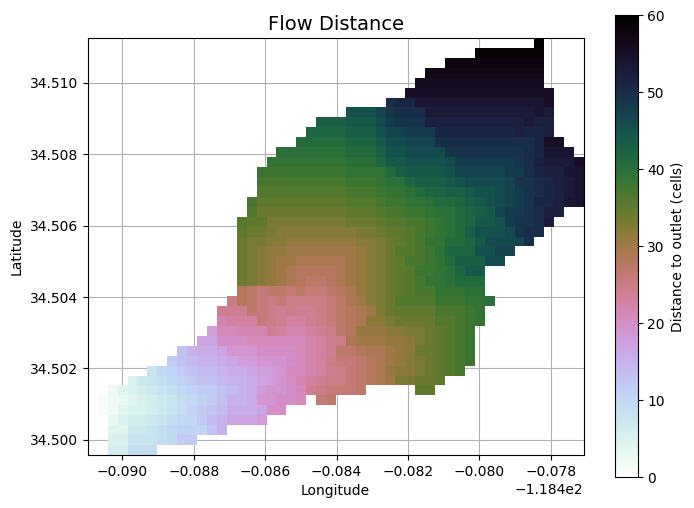

In [7]:
data_path = 'data/ofr20161106_appx-1.xlsx'

df = pd.read_excel(data_path, sheet_name='Appendix1_ModelData')
print(df.head())

x = df['UTM_X'].astype(float)
y = df['UTM_Y'].astype(float)
zone = df['UTM_Zone'].astype(int)

print(f"x: {x[0]}, y: {y[0]}, zone: {zone[0]}")
bounds, suggested_buffer = utm_to_geographic_bounds(x[0], y[0], zone[0], 'north', 5, 'fire')

output_file = '/home/quinn/pwfdf/data/dem.tif'
elevation.clip(bounds=bounds, output=output_file, product='SRTM1')

delineate_watershed(output_file, (bounds[0], bounds[1]))

In [17]:
data = PWFDF_Data()
x, y = data.coordinates_wgs84(0)
print(f"x: {x}, y: {y}")

ws = get_watershed_from_usgs_api(x, y)

x: -118.43707630192644, y: 34.54235771812747


In [16]:
print(ws)

{'name': 'globalwatershedpoint', 'feature': {'geometryType': 'esriGeometryPoint', 'spatialReference': {'wkid': 4326}, 'fields': [{'alias': 'FID', 'type': 'esriFieldTypeOID', 'name': 'FID'}, {'alias': 'OBJECTID', 'type': 'esriFieldTypeInteger', 'name': 'OBJECTID'}, {'alias': 'HydroID', 'type': 'esriFieldTypeInteger', 'name': 'HydroID'}, {'alias': 'DrainID', 'type': 'esriFieldTypeInteger', 'name': 'DrainID'}, {'alias': 'Name', 'type': 'esriFieldTypeString', 'name': 'Name'}, {'alias': 'Descript', 'type': 'esriFieldTypeString', 'name': 'Descript'}, {'alias': 'HUCID', 'type': 'esriFieldTypeString', 'name': 'HUCID'}, {'alias': 'ReachCode', 'type': 'esriFieldTypeString', 'name': 'ReachCode'}, {'alias': 'Measure', 'type': 'esriFieldTypeDouble', 'name': 'Measure'}, {'alias': 'Latitude', 'type': 'esriFieldTypeDouble', 'name': 'Latitude'}, {'alias': 'Longitude', 'type': 'esriFieldTypeDouble', 'name': 'Longitude'}], 'features': [{'geometry': {'x': -118.43707708796777, 'y': 34.54229339896216}, 'att

In [23]:
from IPython.display import display, HTML

def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

In [25]:
import folium

m = folium.Map([x, y], zoom_start=4)
folium.GeoJson(ws).add_to(m)
folium_deepnote_show(m)